In [8]:
X = [2,3,4,2,3,4]
sum(X)/len(X)

3.0

In [10]:
X = [2,3,4,2,3,4]
mu = 0
for k,x in enumerate(X):
    mu = mu + (1/(k+1))*(x-mu)
    print(mu)


2.0
2.5
3.0
2.75
2.8
3.0


In [1]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model, GeneralModel
from rl import Agent

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

<AxesSubplot: >

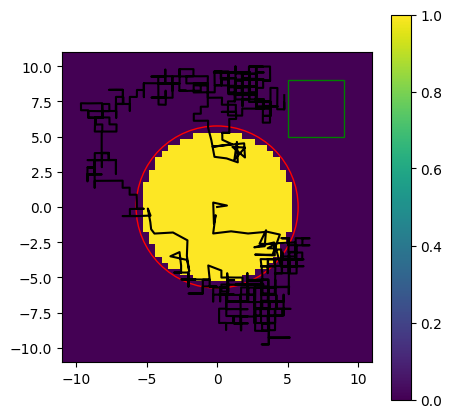

In [2]:
env = NormalMoveEnv()
t = Trajectory(env)
t.plot(env.plot())

In [3]:
m = GeneralModel(env, lr=1e-9, momentum=.9)
# ll = m.batch_train(t.run, 1000, log=True)
ll = m.batch_train(t.run, 1000)
print(ll[0], ll[-1])

v = m.model(torch.tensor([[0.,0.], [-9.,-9.]]).type(torch.DoubleTensor))
print(torch.exp(v[:,0]))
print(v[:,1])
# print(torch.exp(v))

1853.0269940925223 1729.0280690377972
tensor([0.7897, 0.6639], dtype=torch.float64, grad_fn=<ExpBackward0>)
tensor([0.1352, 0.1619], dtype=torch.float64, grad_fn=<SelectBackward0>)


<AxesSubplot: >

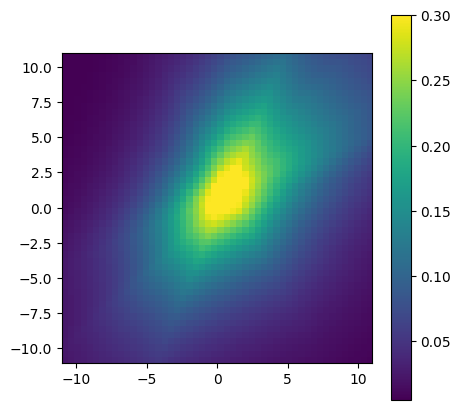

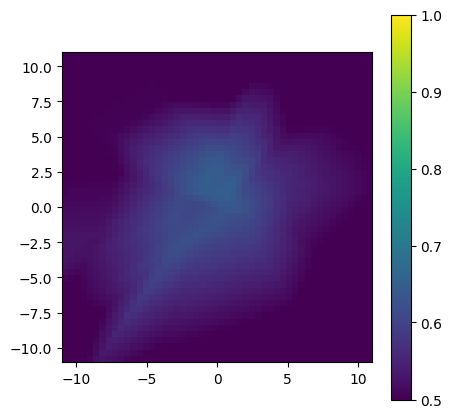

In [4]:
ll = m.batch_train(t.run, 1_000_000)
print(ll[-1])
m.plot(param=0)
m.plot(param=1)

v = m.model(torch.tensor([[0.,0.], [-9.,-9.]]).type(torch.DoubleTensor))
print(torch.exp(v[:,0]))
print(v[:,1])